## Sirada Thoungvitayasutee 301292632
Assignment 1 Question 1

### 1. Retrieve and load the mnist_784 dataset of 70,000 instances.

In [1]:
from sklearn.datasets import fetch_openml
import numpy as np

#Load mnist dataset from open ml
mnist_dataset = fetch_openml('mnist_784', version=1, parser='auto')

X,y = mnist_dataset.data, mnist_dataset.target

#convert y into integer
y = y.astype(np.uint8)

#check instances, should be 70,000 instances with 784 features
print(X.shape)

(70000, 784)


### 2. Display each digit.

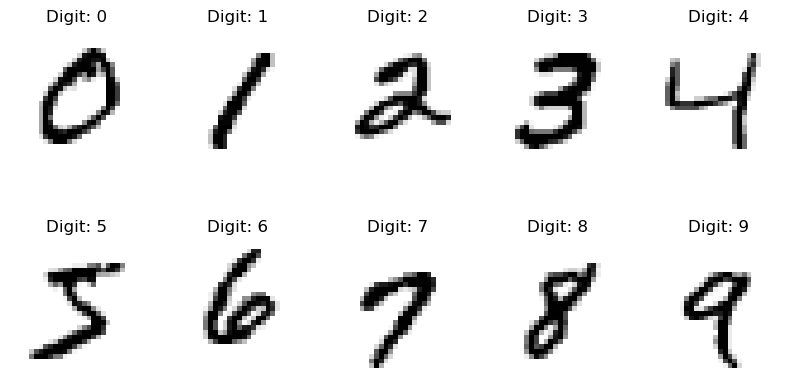

In [2]:
import matplotlib.pyplot as plt

#get a digit 0-9
unique_digits = np.unique(y)
plt.figure(figsize=(10,5))

#create a function to plot data
def plot_digit(data):
    #reshape the data back into 28X28 pixel
    image = data.reshape(28,28)
    plt.imshow(image, cmap='binary')
    plt.axis('off')
    
#display each digits

for i, digit in enumerate(unique_digits):
    #get the first index for each digit
    index = np.where(y == digit)[0][0]
    plt.subplot(2,5,i+1)
    plot_digit(X.iloc[index].values)
    plt.title(f'Digit: {digit}')
    plt.axis('off')

plt.show()

### 3. Use PCA to retrieve the 1st and 2nd principal component and output their explained variance ratio.

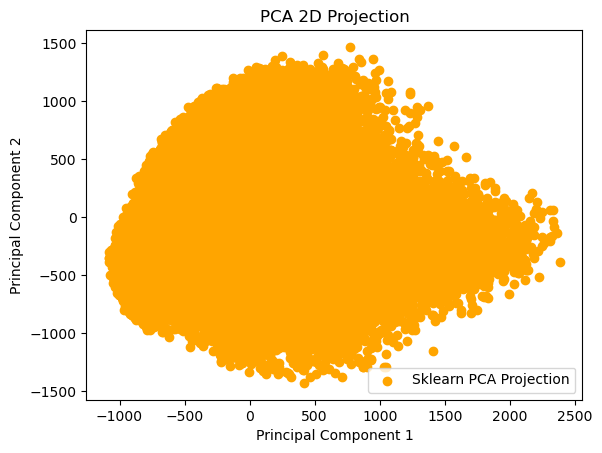

Explained Variance: [0.09746116 0.07155445]
Explained variance for the 1st principal component: 0.0974612
Explained variance for the 2nd principal component: 0.0715544


In [3]:
from sklearn.decomposition import PCA

#create PCA instance
#apply PCA to reduce the dimensionality of the dataset to two dimensions 
pca = PCA(n_components=2)

#fit pca to the data
X_pca = pca.fit_transform(X)

# Visualizing the sklearn PCA result
plt.scatter(X_pca[:, 0], X_pca[:, 1], color='orange', label='Sklearn PCA Projection')
plt.title('PCA 2D Projection')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

#get explained variance ratio
explained_variance = pca.explained_variance_ratio_
first_principal = explained_variance[0]
second_principal = explained_variance[1]

print(f'Explained Variance: {explained_variance}')

print(f'Explained variance for the 1st principal component: {first_principal:.7f}')
print(f'Explained variance for the 2nd principal component: {second_principal:.7f}')

In [4]:
#check cumulative explainced variance
#output means that 9.7% of the dataset's variance lies along the first PC and 7.1% lies along the second PC
cumulative_explained_variance = np.cumsum(explained_variance)
print(f'Cumulative: {cumulative_explained_variance}')

Cumulative: [0.09746116 0.16901561]


### 4. Plot the projections of the 1st and 2nd principal component onto a 1D hyperplane.

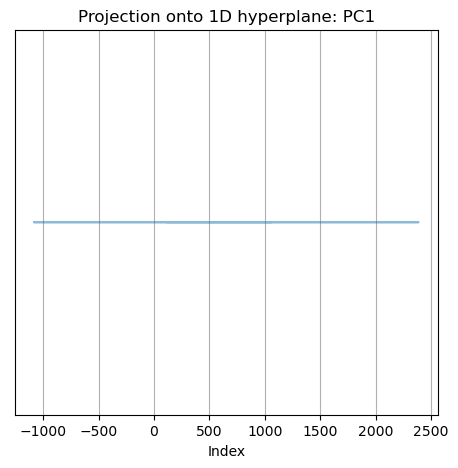

<function matplotlib.pyplot.show(close=None, block=None)>

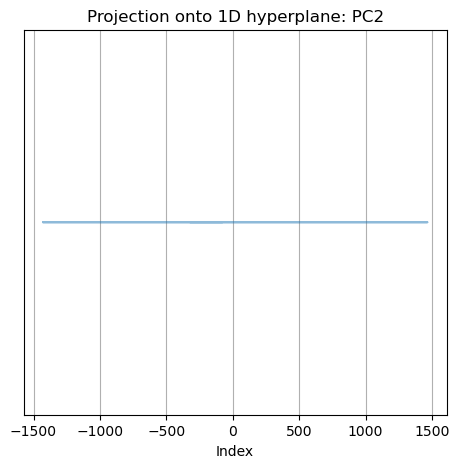

In [5]:
#extract each principal component
pc1 = X_pca[:,0]
pc2 = X_pca[:,1]

#plot projections onto a 1D 
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(pc1, np.zeros_like(pc1), alpha=0.5, markersize=2)
plt.xlabel('Index')
plt.yticks([])
plt.title('Projection onto 1D hyperplane: PC1')
plt.grid(True)

plt.show()

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(pc2, np.zeros_like(pc2), alpha=0.5, markersize=2)
plt.xlabel('Index')
plt.yticks([])
plt.title('Projection onto 1D hyperplane: PC2')
plt.grid(True)

plt.show

### 5. Use Incremental PCA to reduce the dimensionality of the MNIST dataset down to 154 dimensions.

In [6]:
from sklearn.decomposition import IncrementalPCA

#reduct to 154 dimensions
inc_pca = IncrementalPCA(n_components=154)

X_reduced = inc_pca.fit_transform(X)

#the dimension will be reduced from 784 to 154
print(f'Original shape: {X.shape}')
print(f'Reduced shape: {X_reduced.shape}')

Original shape: (70000, 784)
Reduced shape: (70000, 154)


### 6. Display the original and compressed digits from.

X_reduced: (70000, 154)
X_compressed: (70000, 784)


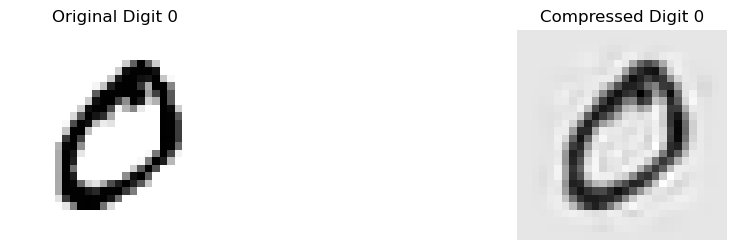

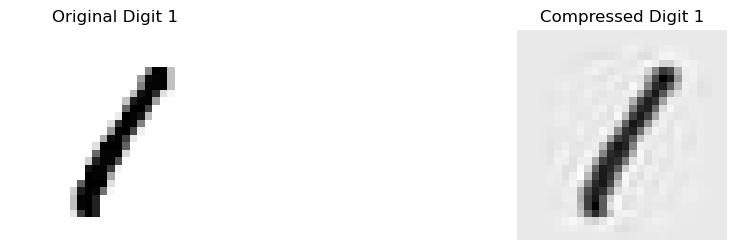

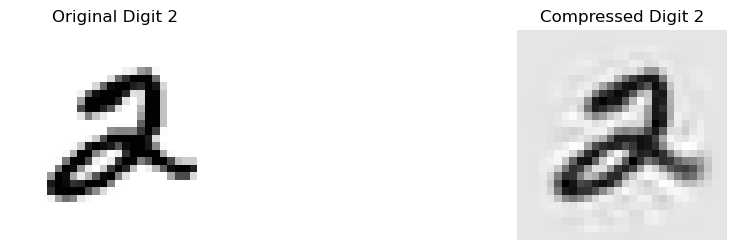

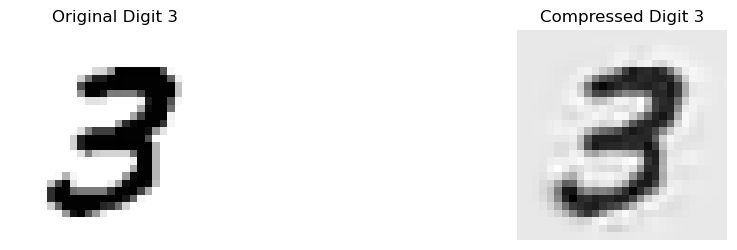

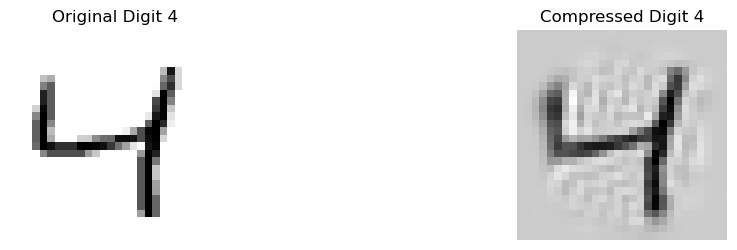

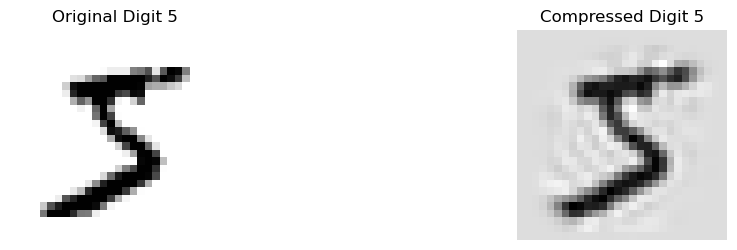

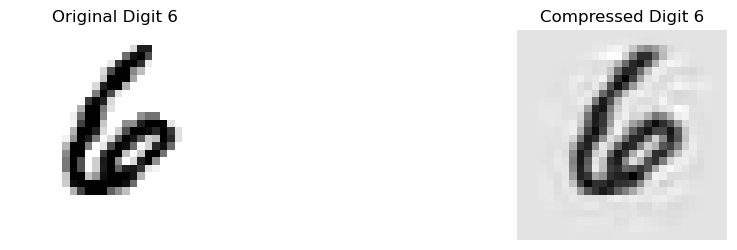

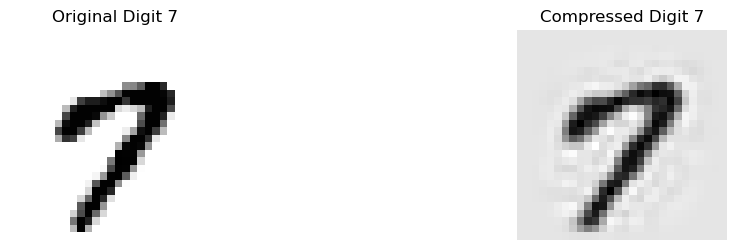

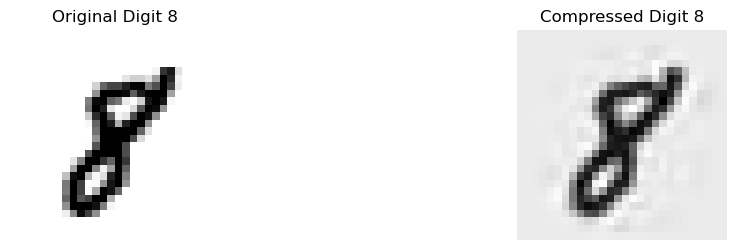

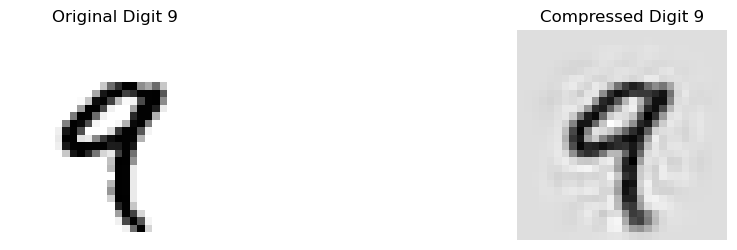

In [7]:
#Display some original digits

#X_reduced has 154 dimensions so have to inverse to original form first. 
# Otherwise will get error that cannot reshape into (28,28)
X_compressed = inc_pca.inverse_transform(X_reduced)
print(f'X_reduced: {X_reduced.shape}')
print(f'X_compressed: {X_compressed.shape}')

#original
X_numpy = X.to_numpy()

#to show number 0 to 9
digit_index = [np.where(y==i)[0][0] for i in range(10)]
num_digits = 10

for digit in range(num_digits):
    plt.figure(figsize=(12,6))
    #display the original
    plt.subplot(2,2,1)
    plot_digit(X_numpy[digit_index[digit]])
    plt.title(f'Original Digit {digit}')

    #Display the compressed
    plt.subplot(2,2,2)
    plot_digit(X_compressed[digit_index[digit]])
    plt.title(f'Compressed Digit {digit}')

    plt.show()